In [1]:
import matplotlib.pyplot as plt
import numpy as np

print(plt.style.available)
from pytdscf.util import read_nc
from pytdscf import units

plt.style.use("bmh")

# Make all new figures/axes transparent by default
plt.rcParams["figure.facecolor"] = "none"  # or (1, 1, 1, 0)
plt.rcParams["axes.facecolor"] = "none"

plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Latin Modern Roman"],
        "mathtext.fontset": "cm",  # still fine; there is no LMR math in mathtext
    }
)
plt.rcParams.update(
    {
        "text.usetex": True,
        # Tell LaTeX to load any package you like
        "text.latex.preamble": r"\usepackage{amssymb}",
    }
)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/Users/hinom/GitHub/radicalpair-tensornetwork/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = read_nc("aiso_chi128_cutoff0.1_eq_B0.05_angle0pi_over_8_n4_arnoldi_prop/reduced_density.nc", [(i,i) for i in range(27)])

In [3]:
SCALE = 1e-09
time = data["time"] * SCALE * 1e06 / units.au_in_fs
time

array([0.     , 0.00025, 0.0005 , 0.00075, 0.001  , 0.00125, 0.0015 ,
       0.00175, 0.002  , 0.00225, 0.0025 , 0.00275, 0.003  , 0.00325,
       0.0035 , 0.00375, 0.004  , 0.00425, 0.0045 , 0.00475, 0.005  ,
       0.00525, 0.0055 , 0.00575, 0.006  , 0.00625, 0.0065 , 0.00675,
       0.007  , 0.00725, 0.0075 , 0.00775, 0.008  , 0.00825, 0.0085 ,
       0.00875, 0.009  , 0.00925, 0.0095 , 0.00975, 0.01   , 0.01025,
       0.0105 , 0.01075, 0.011  , 0.01125, 0.0115 , 0.01175, 0.012  ,
       0.01225, 0.0125 , 0.01275, 0.013  , 0.01325, 0.0135 , 0.01375,
       0.014  , 0.01425, 0.0145 , 0.01475, 0.015  , 0.01525, 0.0155 ,
       0.01575, 0.016  , 0.01625, 0.0165 , 0.01675, 0.017  , 0.01725,
       0.0175 , 0.01775, 0.018  , 0.01825, 0.0185 , 0.01875, 0.019  ,
       0.01925, 0.0195 , 0.01975, 0.02   , 0.02025, 0.0205 , 0.02075,
       0.021  , 0.02125, 0.0215 , 0.02175, 0.022  , 0.02225, 0.0225 ,
       0.02275, 0.023  , 0.02325, 0.0235 , 0.02375, 0.024  , 0.02425,
       0.0245 , 0.02

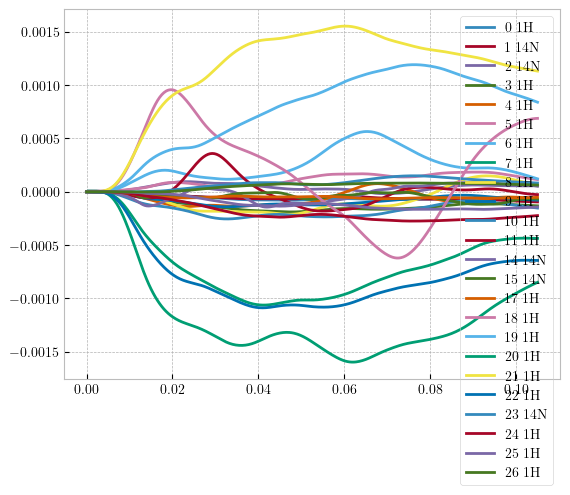

In [4]:
# plt.plot(time, 0.5 * (data[(12,12)][:, 0, 0].real - data[(12,12)][:, 6, 6].real), label="12") # 6x6 (methyl)
# plt.plot(time, 0.5 * (data[(13,13)][:, 0, 0].real - data[(13,13)][:, 8, 8].real), label="13") # 8x8 (ele)
# plt.plot(time, 0.5 * (data[(16,16)][:, 0, 0].real - data[(16,16)][:, 5, 5].real), label="16") # 6x6 (methyl)
for i in range(27):
    if data[(i,i)].shape[1:] == (2,2):
        plt.plot(time, 0.5 * (data[(i,i)][:, 0, 0].real - data[(i,i)][:, 1, 1].real), label=f"{i} 1H")
    elif data[(i,i)].shape[1:] == (3,3):
        plt.plot(time, 0.5 * (data[(i,i)][:, 0, 0].real - data[(i,i)][:, 2, 2].real), label=f"{i} 14N")
    else:
        pass # raise ValueError(f"{data[(i,i)].shape[1:]}")
plt.legend()
plt.show()